## DMIA industry hw 0 

### Задача 1
Что выведет этот код?

Ответом на эту задачу является выведенное число, округлённое до 4го знака, дробная часть отделяется точкой

In [1]:
import numpy as np

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

X_data, y_data = load_breast_cancer(return_X_y=True)

print( '%.4f' % cross_val_score(RandomForestClassifier(criterion='entropy', n_estimators=42, random_state=42), X_data, y_data, cv=3).mean())

0.9648


Задача 2
Напишите свою функцию определения качества модели по следующей метрике: максимальный precision, при условии, что $precision &lt; 1.5 * recall$ и $recall &gt; 0.5$ и определите наилучшее её значение, перебирая гиперпараметры по предложенной сетке

Ответом на эту задачу является максимальное значение качества по предложенной метрике, округлённое до 4го знака, дробная часть отделяется точкой.



In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer

In [11]:
param_grid = {
    'n_estimators' : [10, 20, 30, 40, 50],
    'max_depth' : [None, 5, 10, 15, 20], 
    'criterion': ['entropy', 'gini']
}
param_grid

{'criterion': ['entropy', 'gini'],
 'max_depth': [None, 5, 10, 15, 20],
 'n_estimators': [10, 20, 30, 40, 50]}

In [12]:
X_data, y_data = load_breast_cancer(return_X_y=True)
#X_data[0:2,]
#len(y_data)

In [13]:
estimator = RandomForestClassifier(random_state = 42)

In [14]:
no_grid = {
    'n_estimators' : [50],
    'max_depth' : [5], 
    'criterion': ['gini']
}

In [6]:
print('Accuracy best params and score')
results = GridSearchCV(estimator, param_grid=no_grid, 
                       cv=3, scoring='precision').fit(X_data, y_data)
print( '\t Best Params:', results.best_params_)
print( '\t Best Score:', results.best_score_)

Accuracy best params and score


NameError: name 'GridSearchCV' is not defined

In [115]:
a = np.array([1,0,1,1,1,0])
b = np.array([0.6,0.4,0.3,0.5,0.6,0.2])
#a==1
#np.sum((a==1)&(b==1))
import pandas as pd
from sklearn.metrics import precision_recall_curve
precision, recall, threshold = precision_recall_curve(a,b)
threshold =  np.insert(arr=threshold,obj=0,values=0.0)
#print( precision )
#print( recall) 
#print( threshold)
aa = pd.DataFrame({'precision' : precision, 
                  'recall' : recall,
                  'threshold' : threshold})
aa

,precision,recall,threshold
0,0.80,1.00,0.0
1,0.75,0.75,0.3
2,1.00,0.75,0.4
3,1.00,0.50,0.5
4,1.00,0.00,0.6


In [116]:
threthhold =  np.insert(arr=threshold,obj=0,values=0.0)
threthhold

array([ 0. ,  0. ,  0.3,  0.4,  0.5,  0.6])

In [129]:
precision, recall, threshold = precision_recall_curve(a,b)
threshold = np.insert(arr=threshold, obj=0, values=0.0)
metrics_tab = pd.DataFrame({'precision' : precision,
                            'recall' : recall,
                            'threshold' : threshold})
# filter rows : leave rows which not satisfied conditions
metrics_tab = metrics_tab[ ( metrics_tab['precision'] < 1.5*metrics_tab['recall'] ) &
                          ( metrics_tab['recall'] > 0.5 ) ] 
#print(metrics_tab)
#print(metrics_tab['precision'].max())
metrics_tab.shape[0] < 1

False

In [15]:
def my_custom_loss(y_real, y_pred, exception =-1, verbose=False):
    '''
    returns precision if only two conditions are satisfied
    if not, returns exception = -1 by default
    '''
    tp = np.sum((y_pred==1)&(y_real==1))
    fp = np.sum((y_pred==1)&(y_real==0)) 
    fn = np.sum((y_pred==0)&(y_real==1))
    tn = np.sum((y_pred==0)&(y_real==0))
    precision_tmp  = 1.0*tp/(tp + fp)
    recall_tmp = 1.0*tp/(tp + fn)
    cond_1 = precision_tmp < 1.0*recall_tmp
    cond_2 = recall_tmp > 0.5
    if  cond_1 and cond_2:
        res = precision_tmp
        if(verbose):
            print(res)
    else: 
        res = exception
        if(verbose):
            print("Conditions are not satisfied")
    #print("precision = ", precision_tmp)
    #print("recall = ", recall_tmp)
    #print()
    return res;

In [29]:
from sklearn.metrics import precision_recall_curve
import pandas as pd
def my_custom_loss_2(y_real, y_pred, exception=0, verbose=False):
    '''
    returns precision if only two conditions are satisfied
    if not, returns exception = -1 by default
    '''
    #print("hello")
    y_pred = y_pred[:,1]
    precision, recall, threshold = precision_recall_curve(y_real, y_pred)
    threshold = np.insert(arr=threshold, obj=0, values=0.0)
    metrics_tab = pd.DataFrame({'precision' : precision,
                                'recall' : recall,
                                'threshold' : threshold})
    # filter rows : leave rows which not satisfied conditions
    metrics_tab = metrics_tab[ ( metrics_tab['precision'] < 1.5*metrics_tab['recall'] ) & 
                             ( metrics_tab['recall'] > 0.5 ) ]
    if( metrics_tab.shape[0] == 0):
        return exсeption
    else:
        max_precision = metrics_tab['precision'].max()
        #print(metrics_tab.tail(50))
        print( max_precision)
        return max_precision 

In [30]:
scorer = make_scorer(my_custom_loss_2, greater_is_better=True, needs_proba=True)

In [27]:
print('Custom loss best params and score')
results_2 = GridSearchCV(estimator=estimator, 
                         param_grid=no_grid, 
                         cv=3, scoring=scorer, verbose=False).fit(X_data, y_data) 

Custom loss best params and score
1.0
1.0
0.991596638655
1.0
0.990990990991
1.0


In [31]:
print( "\tBest params for custom loss:", results_2.best_params_)
print( "\tBest score for cusom loss:", results_2.best_score_)

	Best params for custom loss: {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 50}
	Best score for cusom loss: 0.994201509037


### Задача 3
Какова минимальная сторона квадрата с параллельными осям сторонами, содержащего все точки из $X$?

Ответом на эту задачу является число, округлённое до 2го знака, дробная часть отделяется точкой.

In [33]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

data = load_breast_cancer()
X = data.data[:,:2]

In [34]:
X

array([[ 17.99,  10.38],
       [ 20.57,  17.77],
       [ 19.69,  21.25],
       ..., 
       [ 16.6 ,  28.08],
       [ 20.6 ,  29.33],
       [  7.76,  24.54]])

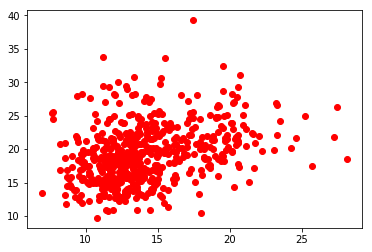

In [35]:
plt.plot(X[:,0], X[:,1], 'ro')
plt.show()

In [38]:
X[:,1].max() - X[:,1].min()

29.57

In [8]:
def factorial(n):
    if (n==0):
        return 1
    else:
        return(n*factorial(n-1));

In [9]:
f_100 = factorial(100)
f_50 = factorial(50)
N = 2**100

In [12]:
p_50 = f_100/(f_50*f_50)/2**100
p_50

0.07958923738717877

In [11]:
p_51 = p_50*(50.0/51)
p_52 = p_51*(49.0/52)

In [49]:
ans = 0.5 - 1.0*(p_50 + p_51 + p_52)/(2**100)
ans

0.26885508810103664

In [51]:
print(p_50/2**100)
print(p_51/2**100)
print(p_52/2**100)

0.07958923738717877
0.07802866410507722
0.07352701040670738


In [52]:
count = 0;
for i in range(53,101):
    count += factorial(100)/(factorial(i)*factorial(100-i))
ans = count/2**100
print(ans)

0.3086497067946261


Будем использовать формулу Муавра-Лапласа для вычисления P_m = P( m единиц в 100 испытаниях бернулли)


In [17]:
def x_m(m,n=100,p=0.5): 
    return (m-p*n)/(np.sqrt(p*(1-p)*n));

def P_m(m,n=100,p=0.5):
    return 1.0/(np.sqrt(2*np.pi*n*p*(1-p)))*np.exp(-0.5*x_m(m=m,n=n,p=p)**2);

In [18]:
print(p_50)
print(P_m(m=50))

0.07958923738717877
0.0797884560803


In [54]:
factoril*100

1267650600228229401496703205376

In [55]:
factorail(100)

NameError: name 'factoril' is not defined

In [ ]:
import numpy as np

print('%.3f' % (np.array([scipy.special.binom(100, i) for i in range(53, 101)]).sum() / 2**100))

In [ ]:
import numpy as np

print('%.3f' % (np.array([scipy.special.binom(100, i) for i in range(53, 101)]).sum() / 2**100))

In [58]:
import scipy.special
0.5 -  scipy.special.binom(100, 50)/2**100 - scipy.special.binom(100, 51)/2**100  - scipy.special.binom(100, 52)/2**100

0.26885508810103675